In [60]:
import random
import numpy as np

class KMeans:
    def __init__(self, n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.centroids = None
        self.max_iter = max_iter

    def fit_predict(self, X):
        random_indexes = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_indexes]

        for i in range(self.max_iter):
            #assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids

            #move centroids
            self.centroids = self.move_centroids(X, cluster_group)

            #check finish
            if(old_centroids == self.centroids).all():
                break

        return cluster_group
            

    def assign_clusters(self, X):
        cluster_group =[]
        
        for row in X:
            distances = []
            for centroid in self.centroids:
                dist = np.linalg.norm(row - centroid)
                distances.append(dist)
            min_dist = min(distances)
            min_index = distances.index(min_dist)
            cluster_group.append(min_index)

        return np.array(cluster_group);

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [64]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centroid = [(-5,5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]

X,y = make_blobs(n_samples=100, n_features=2, random_state=2)

In [68]:
k = KMeans(n_clusters=4,max_iter=100)

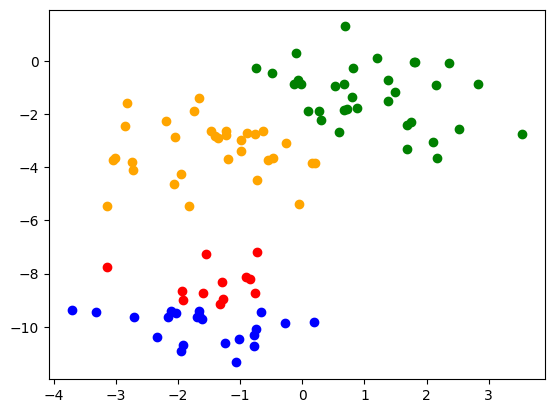

In [69]:
y_means = k.fit_predict(X)
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color='red')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color='blue')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color='green')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color='orange')
plt.show()